In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os
print('\n'.join(os.listdir(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)')))

References
Untitled0.ipynb
Week_1_Python_1.ipynb
heart.csv
iris.csv
pima-indians-diabetes.csv
sonar.csv
housing.csv
winequality-white.csv
auto.csv
bottle.csv


In [3]:
df = pd.read_csv(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)/housing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**CRIM** per capita crime rate by town

**ZN** proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS** proportion of non-retail business acres per town

**CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX** nitric oxides concentration (parts per 10 million)

**RM** average number of rooms per dwelling

**AGE** proportion of owner-occupied units built prior to 1940

**DIS** weighted distances to five Boston employment centres

**RAD** index of accessibility to radial highways

**TAX** full-value property-tax rate per 10,000usd

**PTRATIO** pupil-teacher ratio by town

**B** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**LSTAT** % lower status of the population 

In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c44fdfe48>,
      dtype=object)

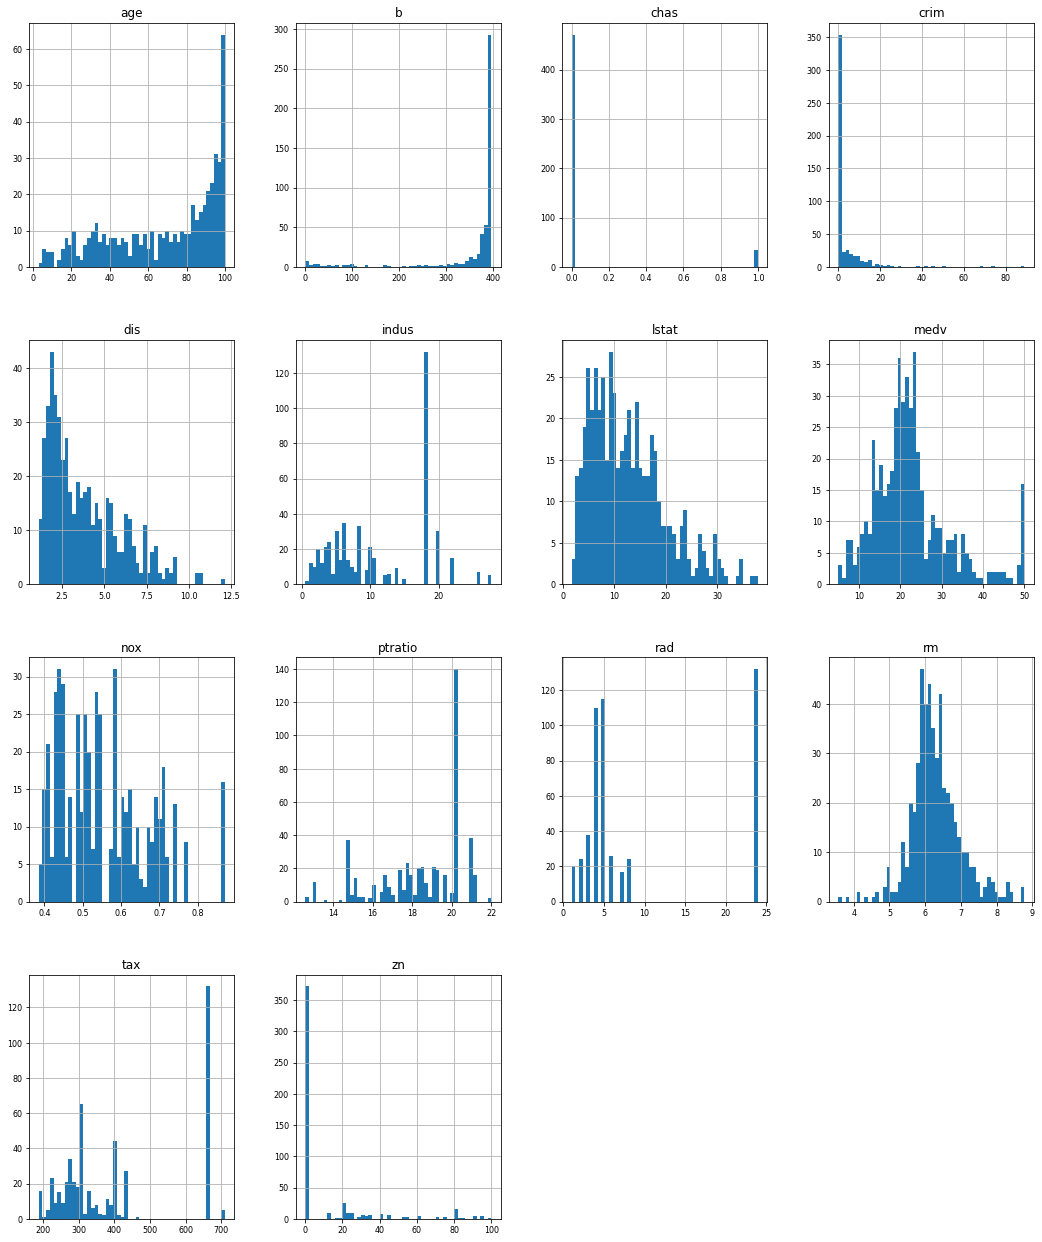

In [6]:
df.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c4506b320>,
      dtype=object)

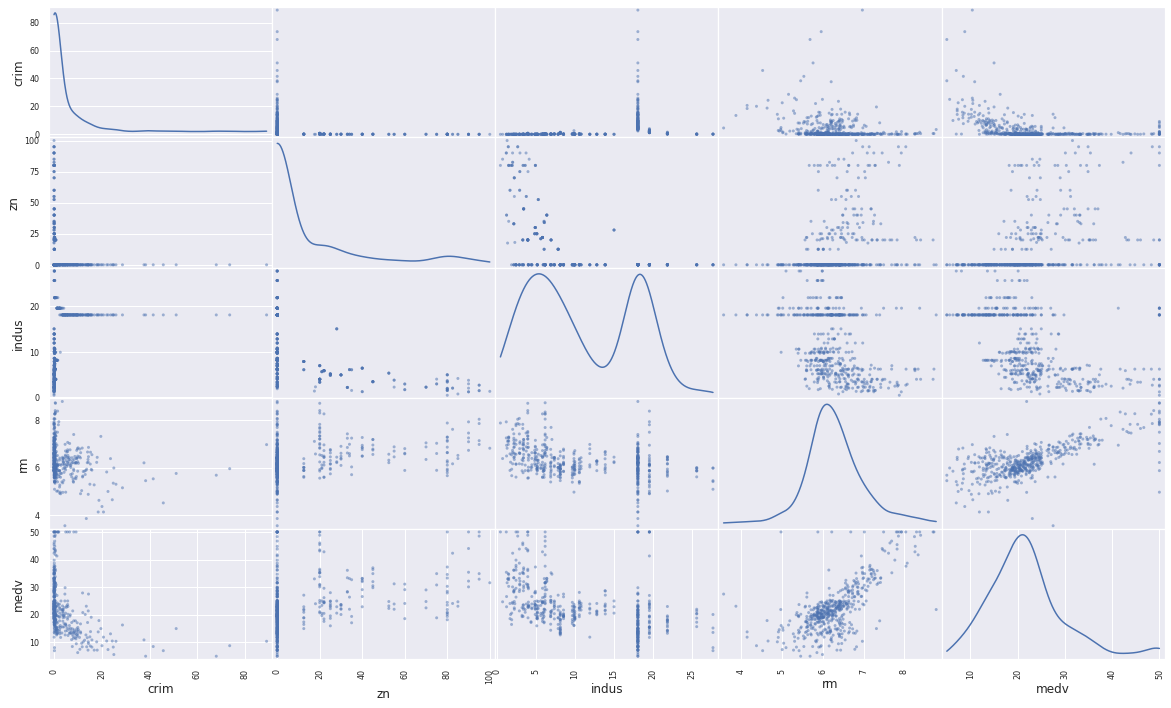

In [7]:
sns.set()
col = ['crim', 'zn', 'indus', 'rm', 'medv']
pd.plotting.scatter_matrix(df[col], figsize=(20, 12), diagonal='kde')

In [8]:
#Cek Missing Values
print(df.isnull().sum(), '\n')
print('Terdapat {} Missing Values pada Dataset'.format(df.isnull().sum().sum()))

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64 

Terdapat 0 Missing Values pada Dataset


In [9]:
#Melihat korelasi features terhadap target
df.corr()['medv'][:-1]

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
Name: medv, dtype: float64

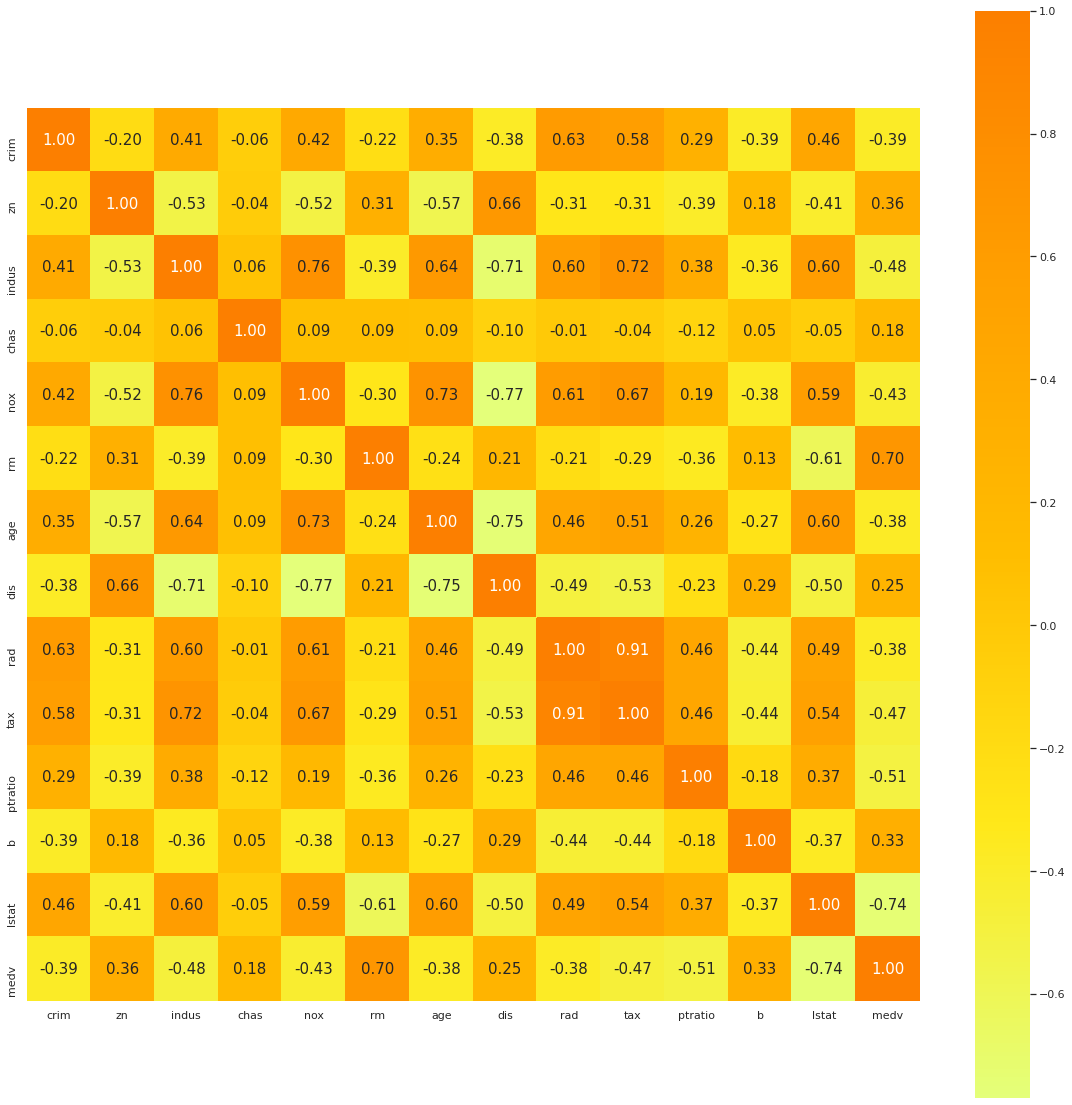

In [10]:
#Cek korelasi dengan lebih jelas dengan heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Wistia')

1. Lakukan preprocessing terhadap data menggunakan:
  - StandardScaler
  - Yeo-Johnson (PowerTransformer)
  - Box-Cox Transformation (PowerTransformer)
  - QuantileTransformer
  - MinMaxScaler
  - MaxAbsScaler
  - RobustScaler

  Dan jelaskan apabila hasil training untuk algoritma LinearRegression untuk masing-masing metode transformasi data dibandingkan!

  Jelaskan juga apabila terdapat metode preprocessing yang tidak dapat digunakan untuk salah satu dataset!

**Machine Learning Model**

**Data Preprocessing**

In [11]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler

In [12]:
stdr = StandardScaler()
powbox = PowerTransformer(method='box-cox', standardize=True)
powbox1 = PowerTransformer(method='yeo-johnson', standardize=True)
quan = QuantileTransformer()
minmax = MinMaxScaler()
maxabs = MaxAbsScaler()
rbst = RobustScaler()

In [13]:
X = df.drop(['medv'], axis=1)
y = df['medv']

In [14]:
X_stdr = stdr.fit_transform(X.values)
y_stdr = stdr.fit_transform(df['medv'].values.reshape(-1,1)).flatten()

#X_powbox = powbox.fit_transform(X.values)
#y_powbox = powbox.fit_transform(df['medv'].values.reshape(-1,1)).flatten()

X_powbox1 = powbox1.fit_transform(X.values)
y_powbox1 = powbox1.fit_transform(df['medv'].values.reshape(-1,1)).flatten()

X_quan = quan.fit_transform(X.values)
y_quan = quan.fit_transform(df['medv'].values.reshape(-1,1)).flatten()

X_minmax = minmax.fit_transform(X.values)
y_minmax = minmax.fit_transform(df['medv'].values.reshape(-1,1)).flatten()

X_maxabs = maxabs.fit_transform(X.values)
y_maxabs = maxabs.fit_transform(df['medv'].values.reshape(-1,1)).flatten()

X_rbst = rbst.fit_transform(X.values)
y_rbst = rbst.fit_transform(df['medv'].values.reshape(-1,1)).flatten()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


**Using Standard Scaler**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_stdr, y_stdr, test_size=0.25, random_state=10)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [17]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
prediksi_linreg = linreg.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, prediksi_linreg)
mae = mean_absolute_error(y_test, prediksi_linreg)
r2 = r2_score(y_test, prediksi_linreg)
print('MSE (Mean Squared Error) Using Standard Scaler is  :', mse)
print('MAE (Mean Absolute Error) Using Standard Scaler is :', mae)
print('r^2 score Using Standard Scaler is                 :', r2)
print('RMSE (Root Mean Squared Error) is                  :', np.sqrt(mean_squared_error(y_test, prediksi_linreg)))

MSE (Mean Squared Error) Using Standard Scaler is  : 0.3843011995466092
MAE (Mean Absolute Error) Using Standard Scaler is : 0.41981890085649826
r^2 score Using Standard Scaler is                 : 0.6745585065949401
RMSE (Root Mean Squared Error) is                  : 0.6199203170945514


**Using Power Transformer (yeo-johnson)**

In [19]:
X_train_yeo, X_test_yeo, y_train_yeo, y_test_yeo = train_test_split(X_powbox1, y_powbox1, test_size=0.25, random_state=10)

In [20]:
linreg_yeo = LinearRegression()
linreg_yeo.fit(X_train_yeo, y_train_yeo)
prediksi_linreg_yeo = linreg_yeo.predict(X_test_yeo)

In [21]:
mse = mean_squared_error(y_test_yeo, prediksi_linreg_yeo)
mae = mean_absolute_error(y_test_yeo, prediksi_linreg_yeo)
r2 = r2_score(y_test_yeo, prediksi_linreg_yeo)
print('MSE (Mean Squared Error) Using Power Transformer is        :', mse)
print('MAE (Mean Absolute Error) Using Power Transformer is       :', mae)
print('r^2 score Using Power Transformer is                       :', r2)
print('RMSE (Root Mean Squared Error) Using Power Transformer is  :', np.sqrt(mean_squared_error(y_test_yeo, prediksi_linreg_yeo)))

MSE (Mean Squared Error) Using Power Transformer is        : 0.23769730132818268
MAE (Mean Absolute Error) Using Power Transformer is       : 0.3507403782365354
r^2 score Using Power Transformer is                       : 0.7659515234483079
RMSE (Root Mean Squared Error) Using Power Transformer is  : 0.48754210210830273


**Using Quantile Transformer**

In [22]:
X_train_quan, X_test_quan, y_train_quan, y_test_quan = train_test_split(X_quan, y_quan, test_size=0.25, random_state=10)

In [23]:
linreg_quan = LinearRegression()
linreg_quan.fit(X_train_quan, y_train_quan)
prediksi_linreg_quan = linreg_quan.predict(X_test_quan)

In [24]:
mse = mean_squared_error(y_test_quan, prediksi_linreg_quan)
mae = mean_absolute_error(y_test_quan, prediksi_linreg_quan)
r2 = r2_score(y_test_quan, prediksi_linreg_quan)
print('MSE (Mean Squared Error) Using Quantile Transformer is        :', mse)
print('MAE (Mean Absolute Error) Using Quantile Transformer is       :', mae)
print('r^2 score Using Quantile Transformer is                       :', r2)
print('RMSE (Root Mean Squared Error) Using Quantile Transformer is  :', np.sqrt(mean_squared_error(y_test_quan, prediksi_linreg_quan)))

MSE (Mean Squared Error) Using Quantile Transformer is        : 0.019345287469047092
MAE (Mean Absolute Error) Using Quantile Transformer is       : 0.10327402610232495
r^2 score Using Quantile Transformer is                       : 0.7677708183981817
RMSE (Root Mean Squared Error) Using Quantile Transformer is  : 0.13908733755826622


**Using Min Max Scaler**

In [25]:
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax, y_minmax, test_size=0.25, random_state=10)

In [26]:
linreg_minmax = LinearRegression()
linreg_minmax.fit(X_train_minmax, y_train_minmax)
prediksi_linreg_minmax = linreg_minmax.predict(X_test_minmax)

In [27]:
mse = mean_squared_error(y_test_minmax, prediksi_linreg_minmax)
mae = mean_absolute_error(y_test_minmax, prediksi_linreg_minmax)
r2 = r2_score(y_test_minmax, prediksi_linreg_minmax)
print('MSE (Mean Squared Error) Using MinMax Scaler is        :', mse)
print('MAE (Mean Absolute Error) Using MinMax Scaler is       :', mae)
print('r^2 score Using MinMax Scaler is                       :', r2)
print('RMSE (Root Mean Squared Error) Using MinMax Scaler is  :', np.sqrt(mean_squared_error(y_test_minmax, prediksi_linreg_minmax)))

MSE (Mean Squared Error) Using MinMax Scaler is        : 0.016021005775805796
MAE (Mean Absolute Error) Using MinMax Scaler is       : 0.08571779795545566
r^2 score Using MinMax Scaler is                       : 0.6745585065949402
RMSE (Root Mean Squared Error) Using MinMax Scaler is  : 0.1265741117914947


**Using MaxAbs Scaler**

In [28]:
X_train_maxabs, X_test_maxabs, y_train_maxabs, y_test_maxabs = train_test_split(X_maxabs, y_maxabs, test_size=0.25, random_state=10)

In [29]:
linreg_maxabs = LinearRegression()
linreg_maxabs.fit(X_train_maxabs, y_train_maxabs)
prediksi_linreg_maxabs = linreg_maxabs.predict(X_test_maxabs)

In [30]:
mse = mean_squared_error(y_test_maxabs, prediksi_linreg_maxabs)
mae = mean_absolute_error(y_test_maxabs, prediksi_linreg_maxabs)
r2 = r2_score(y_test_maxabs, prediksi_linreg_maxabs)
print('MSE (Mean Squared Error) Using MaxAbs Scaler is        :', mse)
print('MAE (Mean Absolute Error) Using MaxAbs Scaler is       :', mae)
print('r^2 score Using MaxAbs Scaler is                       :', r2)
print('RMSE (Root Mean Squared Error) Using MaxAbs Scaler is  :', np.sqrt(mean_squared_error(y_test_maxabs, prediksi_linreg_maxabs)))

MSE (Mean Squared Error) Using MaxAbs Scaler is        : 0.012977014678402685
MAE (Mean Absolute Error) Using MaxAbs Scaler is       : 0.07714601815991037
r^2 score Using MaxAbs Scaler is                       : 0.6745585065949404
RMSE (Root Mean Squared Error) Using MaxAbs Scaler is  : 0.11391670061234518


**Using Robust Scaler**

In [31]:
X_train_rbst, X_test_rbst, y_train_rbst, y_test_rbst = train_test_split(X_rbst, y_rbst, test_size=0.25, random_state=10)

In [32]:
linreg_rbst = LinearRegression()
linreg_rbst.fit(X_train_rbst, y_train_rbst)
prediksi_linreg_rbst = linreg_rbst.predict(X_test_rbst)

In [33]:
mse = mean_squared_error(y_test_rbst, prediksi_linreg_rbst)
mae = mean_absolute_error(y_test_rbst, prediksi_linreg_rbst)
r2 = r2_score(y_test_rbst, prediksi_linreg_rbst)
print('MSE (Mean Squared Error) Using Robust Scaler is        :', mse)
print('MAE (Mean Absolute Error) Using Robust Scaler is       :', mae)
print('r^2 score Using Robust Scaler is                       :', r2)
print('RMSE (Root Mean Squared Error) Using Robust Scaler is  :', np.sqrt(mean_squared_error(y_test_rbst, prediksi_linreg_rbst)))

MSE (Mean Squared Error) Using Robust Scaler is        : 0.5100977654859004
MAE (Mean Absolute Error) Using Robust Scaler is       : 0.4836740950464587
r^2 score Using Robust Scaler is                       : 0.6745585065949404
RMSE (Root Mean Squared Error) Using Robust Scaler is  : 0.7142112891056122


Nilai RMSE dan MAE berbeda yang artinya error (perbedaan nilai ekspektasi dan prediksi) tidak konstan

Nilai RMSE lebih besar dari MAE yag berarti model lebih sensitif terhadap perbedaan

Terdapat error pada saat memakai Power Transformer dengan method Box-Cox, hal ini disebabkan karena parameter Box-Cox hanya dapat digunakan untuk data-data yang nilainya *strictly* positif (lebih besar dari 0)

2. Gunakan algoritma berikut dan lakukan percobaan hyperparameter tuning untuk mendapatkan hasil terbaik:
  - Random Forest Regressor
  - XGBoost
  - SVM Regressor
  - KNN Regressor

  Hitung angka r^2 serta RMSE untuk menentukan mana algoritma yang paling baik!

**Random Forest Regressor**

Untuk preprocessnya akan digunakan MaxAbs Scaler karena sebelumnya berhasil memberikan nilai RMSE terendah saat digunakan pada Model Linear Regression

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [37]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [38]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train_maxabs, y_train_maxabs)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [39]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [40]:
rf = RandomForestRegressor(n_estimators=400, bootstrap=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, max_depth=None)
rf.fit(X_train_maxabs, y_train_maxabs)
prediksi_rf = rf.predict(X_train_maxabs)
prediksi_rf_test = rf.predict(X_test_maxabs)
r2 = r2_score(y_test_maxabs, prediksi_rf_test)
print('r^2 score Using MaxAbs Scaler is :', r2)
print('RMSE Untuk Model Random Forest dengan n_estimator 400 adalah :', np.sqrt(mean_squared_error(y_test_maxabs, prediksi_rf_test)))

r^2 score Using MaxAbs Scaler is : 0.8721510741712808
RMSE Untuk Model Random Forest dengan n_estimator 400 adalah : 0.07140020810695534


**Support Vector Regressor**

In [41]:
from sklearn.svm import SVR

In [42]:
types = ['rbf', 'poly', 'linear']
for i in types:
  svr = SVR(kernel=i)
  svr.fit(X_train_maxabs, y_train_maxabs)
  prediksi_svr = svr.predict(X_train_maxabs)
  prediksi_svr_test = svr.predict(X_test_maxabs)
  r2 = r2_score(y_test_maxabs, prediksi_svr_test)
  print('r^2 score Using MaxAbs Scaler is :', r2)
  print('Nilai RMSE SVC dengan Kernel = {}'.format(i) , 'adalah', np.sqrt(mean_squared_error(y_test_maxabs, prediksi_svr_test)))
  print('========================================================================================================================')

r^2 score Using MaxAbs Scaler is : 0.7942846075964491
Nilai RMSE SVC dengan Kernel = rbf adalah 0.09056999214677501
r^2 score Using MaxAbs Scaler is : 0.8296971445788484
Nilai RMSE SVC dengan Kernel = poly adalah 0.08240658191422578
r^2 score Using MaxAbs Scaler is : 0.6743763744085716
Nilai RMSE SVC dengan Kernel = linear adalah 0.11394857269397408


**K-Nearest Neighbors**

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
knn = KNeighborsRegressor()
knn.get_params

<bound method BaseEstimator.get_params of KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')>

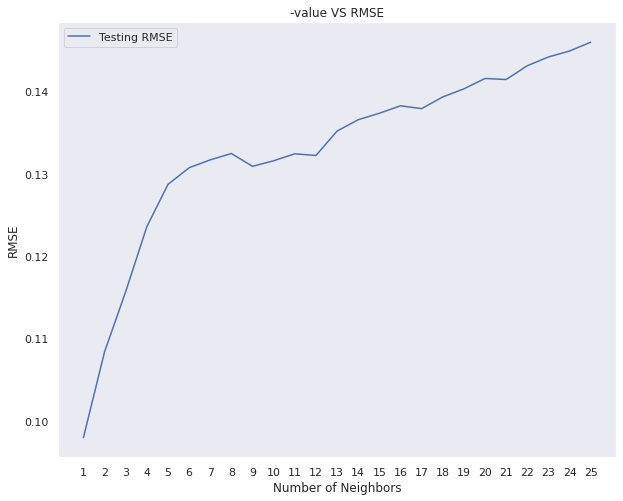


Nilai RMSE terbaik untuk Model KNN adalah 0.1 dengan nilai K = 1


In [45]:
neig = np.arange(1, 26, 1)
rmse_score_test = []

for i, k in enumerate(neig):
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train_maxabs, y_train_maxabs)
  prediksi_knn_test = knn.predict(X_test_maxabs)
  rmse_score_test.append(np.sqrt(mean_squared_error(y_test_maxabs, prediksi_knn_test)))

plt.figure(figsize=[10,8])
plt.plot(neig, rmse_score_test, label = 'Testing RMSE')
plt.legend()
plt.title('-value VS RMSE')
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.xticks(neig)
plt.grid()
plt.show()
print("\nNilai RMSE terbaik untuk Model KNN adalah {} dengan nilai K = {}".format(round(np.min(rmse_score_test), 2), 1+rmse_score_test.index(np.min(rmse_score_test))))

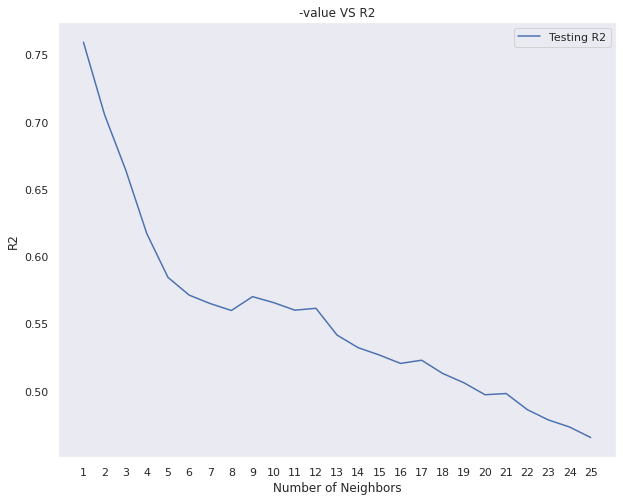


Nilai R2 terbaik untuk Model KNN adalah 0.76 dengan nilai K = 1


In [51]:
neig = np.arange(1, 26, 1)
scorer2 = []

for i, k in enumerate(neig):
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train_maxabs, y_train_maxabs)
  prediksi_knn_test = knn.predict(X_test_maxabs)
  scorer2.append(r2_score(y_test_maxabs, prediksi_knn_test))

plt.figure(figsize=[10,8])
plt.plot(neig, scorer2, label = 'Testing R2')
plt.legend()
plt.title('-value VS R2')
plt.xlabel('Number of Neighbors')
plt.ylabel('R2')
plt.xticks(neig)
plt.grid()
plt.show()
print("\nNilai R2 terbaik untuk Model KNN adalah {} dengan nilai K = {}".format(round(np.max(scorer2), 2), 1+scorer2.index(np.max(scorer2)))) 

**XGBoost Regressor**

In [47]:
from xgboost import XGBRegressor

In [54]:
rating = [0.3, 0.03, 0.003, 0.0003]
for i in rating:
  xgb = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.5, learning_rate=i, max_depth=4, alpha=10, n_estimators=1000)
  xgb.fit(X_train_maxabs, y_train_maxabs)
  prediksi_xgb = xgb.predict(X_train_maxabs)
  prediksi_xgb_test = xgb.predict(X_test_maxabs)
  r2 = r2_score(y_test_maxabs, prediksi_xgb_test)
  print('r^2 score Using MaxAbs Scaler is :', r2)
  print('Nilai RMSE XGBoost Regressor pada Testing Set dengan Learning Rate = {}'.format(i), 'adalah', np.sqrt(mean_squared_error(prediksi_xgb_test, y_test_maxabs)))
  print('================================================================================================================================================================)')

r^2 score Using MaxAbs Scaler is : 0.8515335218313707
Nilai RMSE XGBoost Regressor pada Testing Set dengan Learning Rate = 0.3 adalah 0.07694229553876547
================================================================================================================================================================)
r^2 score Using MaxAbs Scaler is : 0.8547162916445481
Nilai RMSE XGBoost Regressor pada Testing Set dengan Learning Rate = 0.03 adalah 0.07611309711816391
================================================================================================================================================================)
r^2 score Using MaxAbs Scaler is : 0.8120497591156399
Nilai RMSE XGBoost Regressor pada Testing Set dengan Learning Rate = 0.003 adalah 0.08657098903806824
================================================================================================================================================================)
r^2 score Using MaxAbs Scaler is : 0.285927824495

In [55]:
#Tuning objective nya
objektif = ['reg:squarederror', 'reg:logistic', 'reg:tweedie', 'reg:gamma']
for i in objektif:
  xgb = XGBRegressor(objective=i, colsample_bytree=0.5, learning_rate=0.3, max_depth=4, alpha=10, n_estimators=1000)
  xgb.fit(X_train_maxabs, y_train_maxabs)
  prediksi_xgb = xgb.predict(X_train_maxabs)
  prediksi_xgb_test = xgb.predict(X_test_maxabs)
  r2 = r2_score(y_test_maxabs, prediksi_xgb_test)
  print('r^2 score Using MaxAbs Scaler is :', r2)
  print('Nilai RMSE XGBoost Regressor pada Testing Set dengan Objective = {}'.format(i), 'adalah', np.sqrt(mean_squared_error(prediksi_xgb_test, y_test_maxabs)))
  print('================================================================================================================================================================)')

r^2 score Using MaxAbs Scaler is : 0.8515335218313707
Nilai RMSE XGBoost Regressor pada Testing Set dengan Objective = reg:squarederror adalah 0.07694229553876547
================================================================================================================================================================)
r^2 score Using MaxAbs Scaler is : 0.8655223576983861
Nilai RMSE XGBoost Regressor pada Testing Set dengan Objective = reg:logistic adalah 0.07322779870098203
================================================================================================================================================================)
r^2 score Using MaxAbs Scaler is : 0.8263930578526149
Nilai RMSE XGBoost Regressor pada Testing Set dengan Objective = reg:tweedie adalah 0.08320213673725577
================================================================================================================================================================)
r^2 score Using MaxAbs Scaler is :